## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create Espresso Instances

In [2]:
data_folder='/Users/josesho/bin/git-repos/espresso/data'

mb312b_folder=os.path.join(data_folder,'by_genotype/MB312B')
mb213b_folder=os.path.join(data_folder,'by_genotype/MB213B')
starved_choice_folder=os.path.join(data_folder,'24-Hrs-starved-choice')

mb312b=esp.espresso(mb312b_folder)
mb213b=esp.espresso(mb213b_folder)
starved_choice=esp.espresso(starved_choice_folder)

## Plot Development

In [3]:
mb213b

4 feedlogs with a total of 120 flies.
3 genotypes ['w1118;MB213B-Gal4' 'MB213B-Gal4>UAS-TrpA1' 'w1118;UAS-TrpA1'].
2 temperatures [22 29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

In [12]:
plot_kwargs=dict(group_by=['FoodChoice','Genotype'],
                 color_by='FoodChoice',
                 compare_by='Temperature')

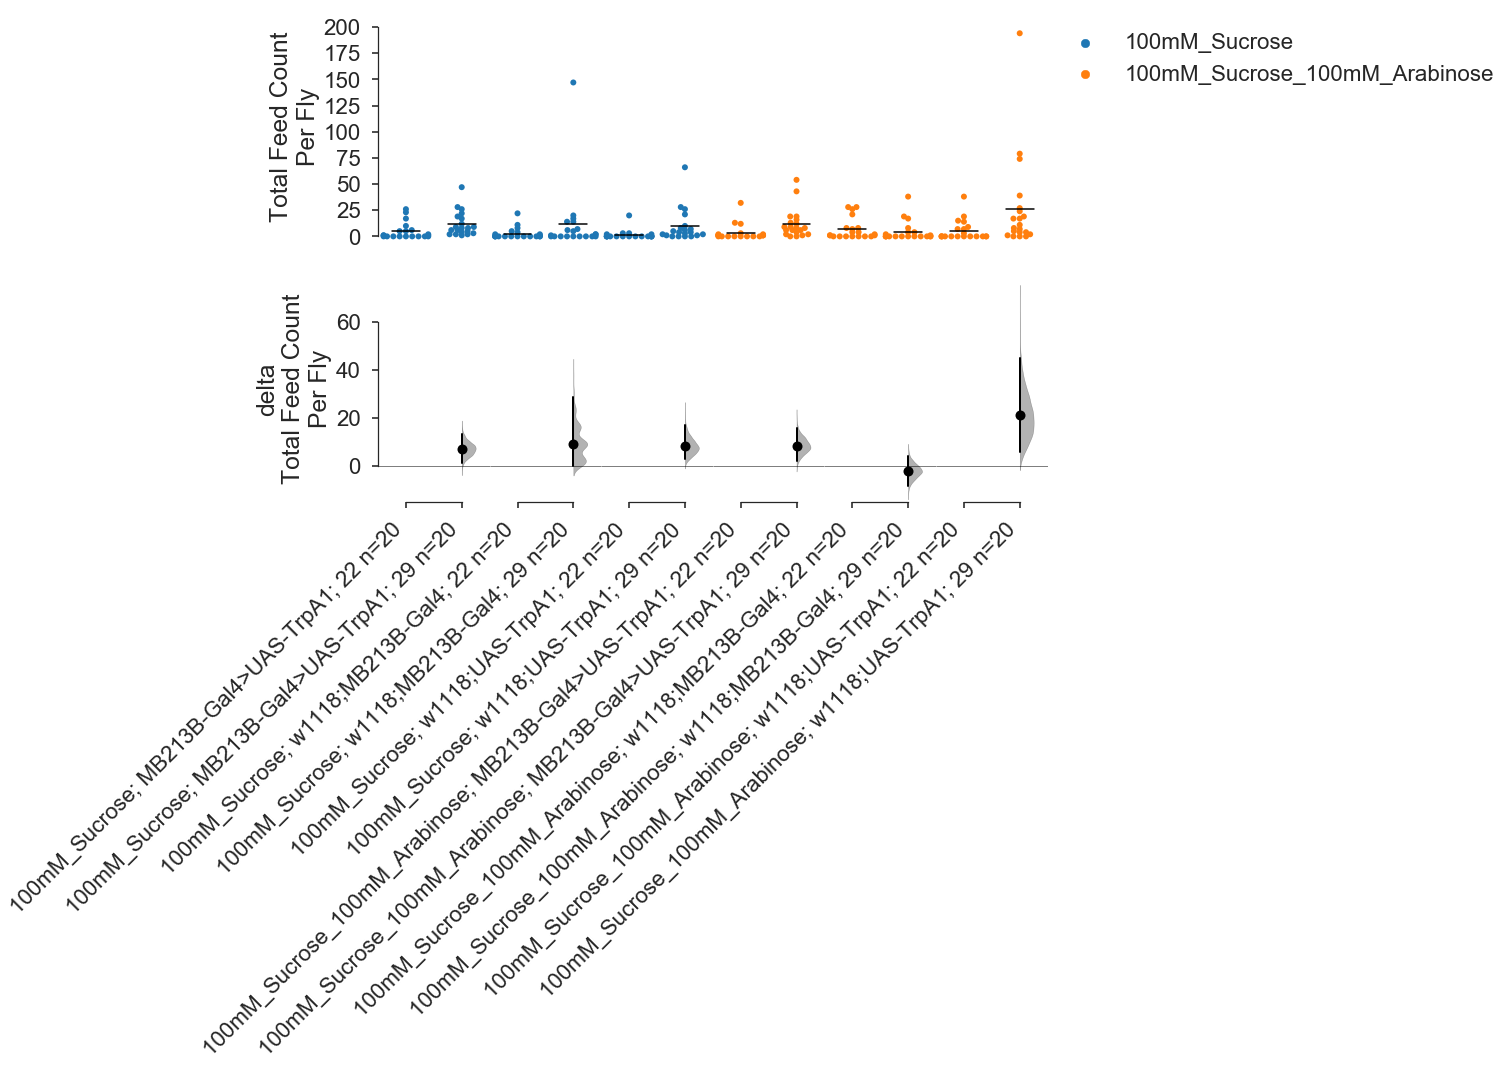

In [13]:
f,b=mb213b.plot.contrast.feed_count_per_fly(**plot_kwargs)

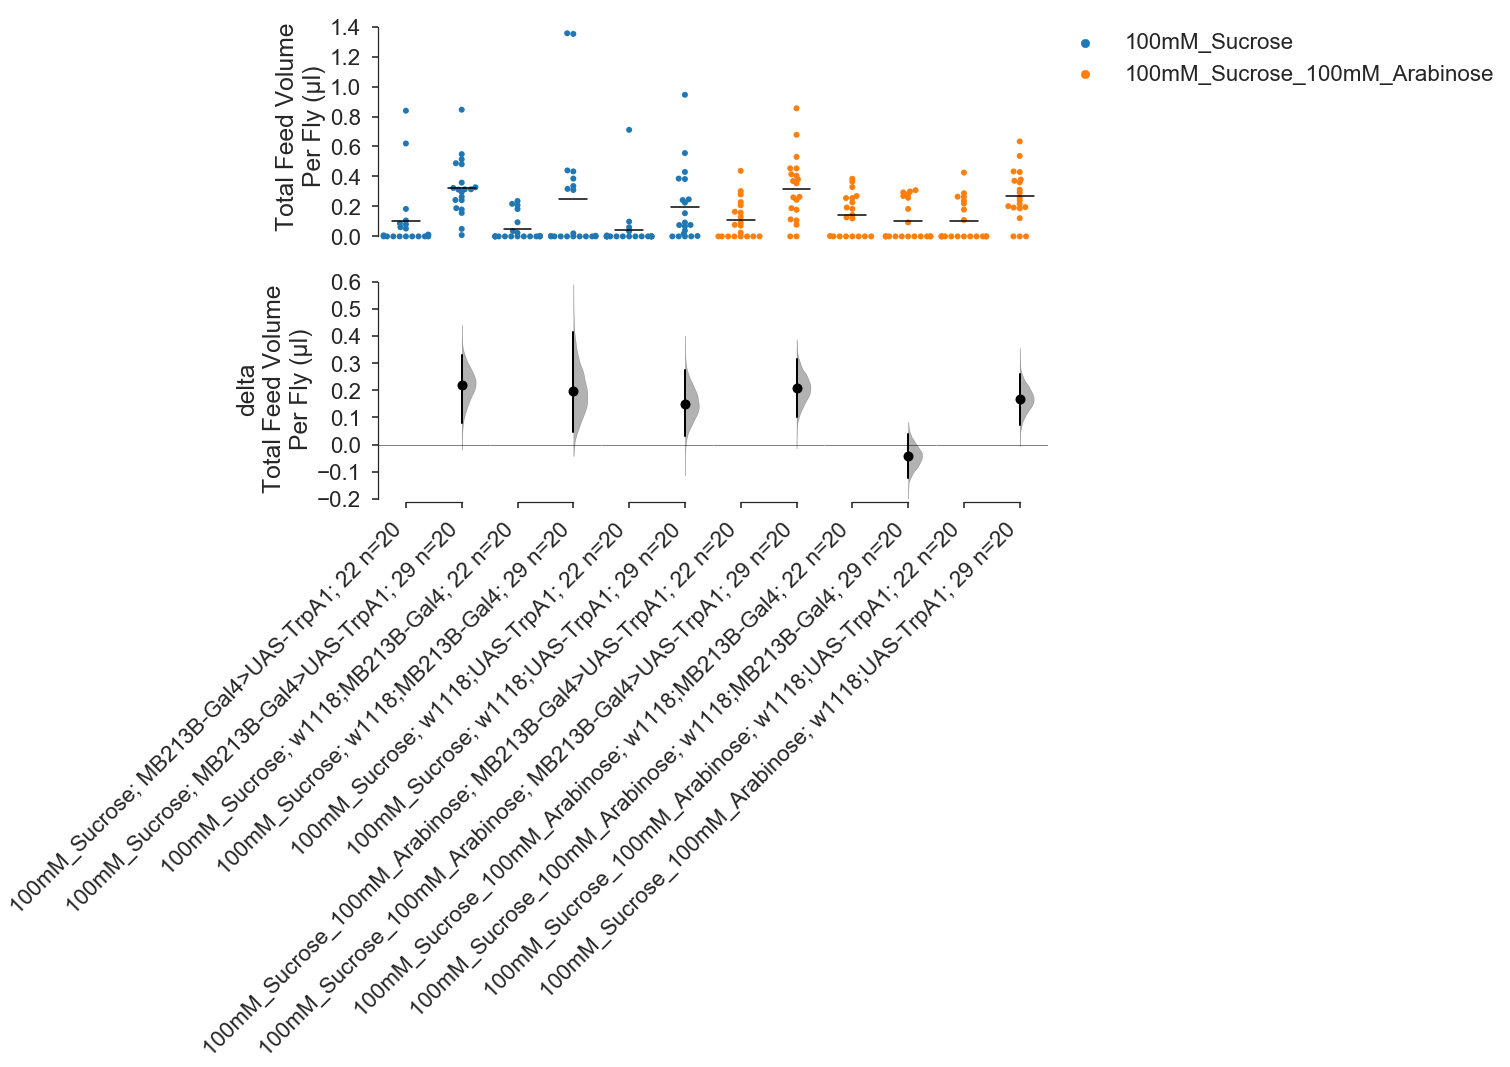

In [14]:
f,b=mb213b.plot.contrast.feed_volume_per_fly(**plot_kwargs)

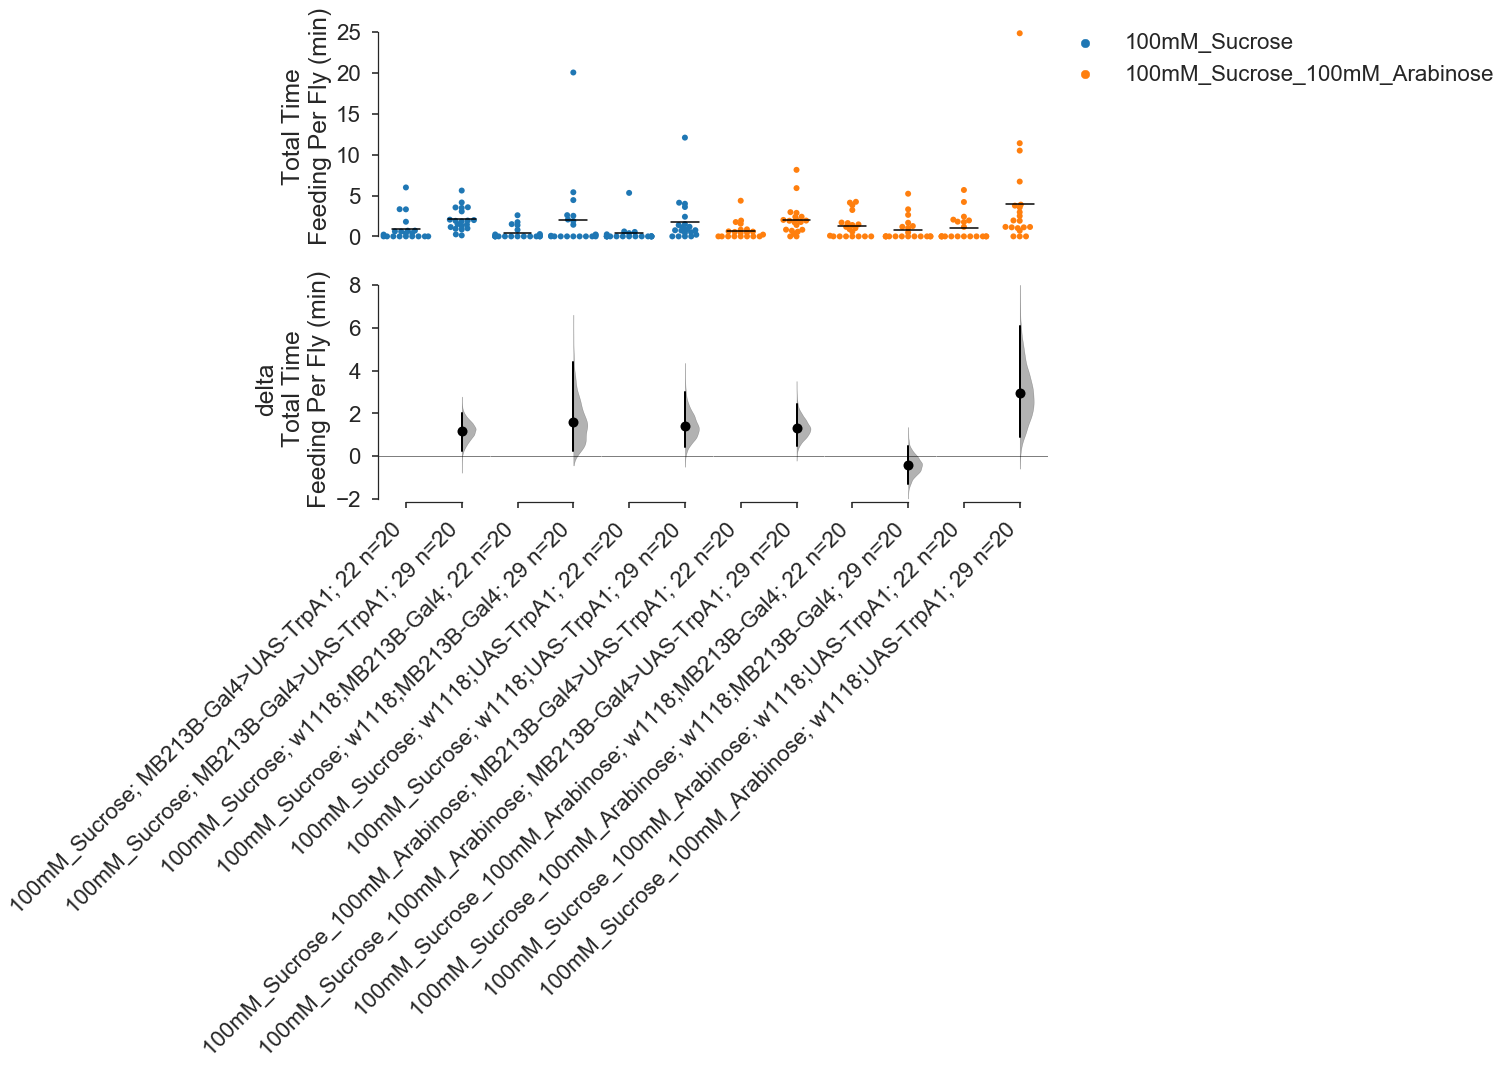

In [15]:
f,b=mb213b.plot.contrast.feed_duration_per_fly(**plot_kwargs)

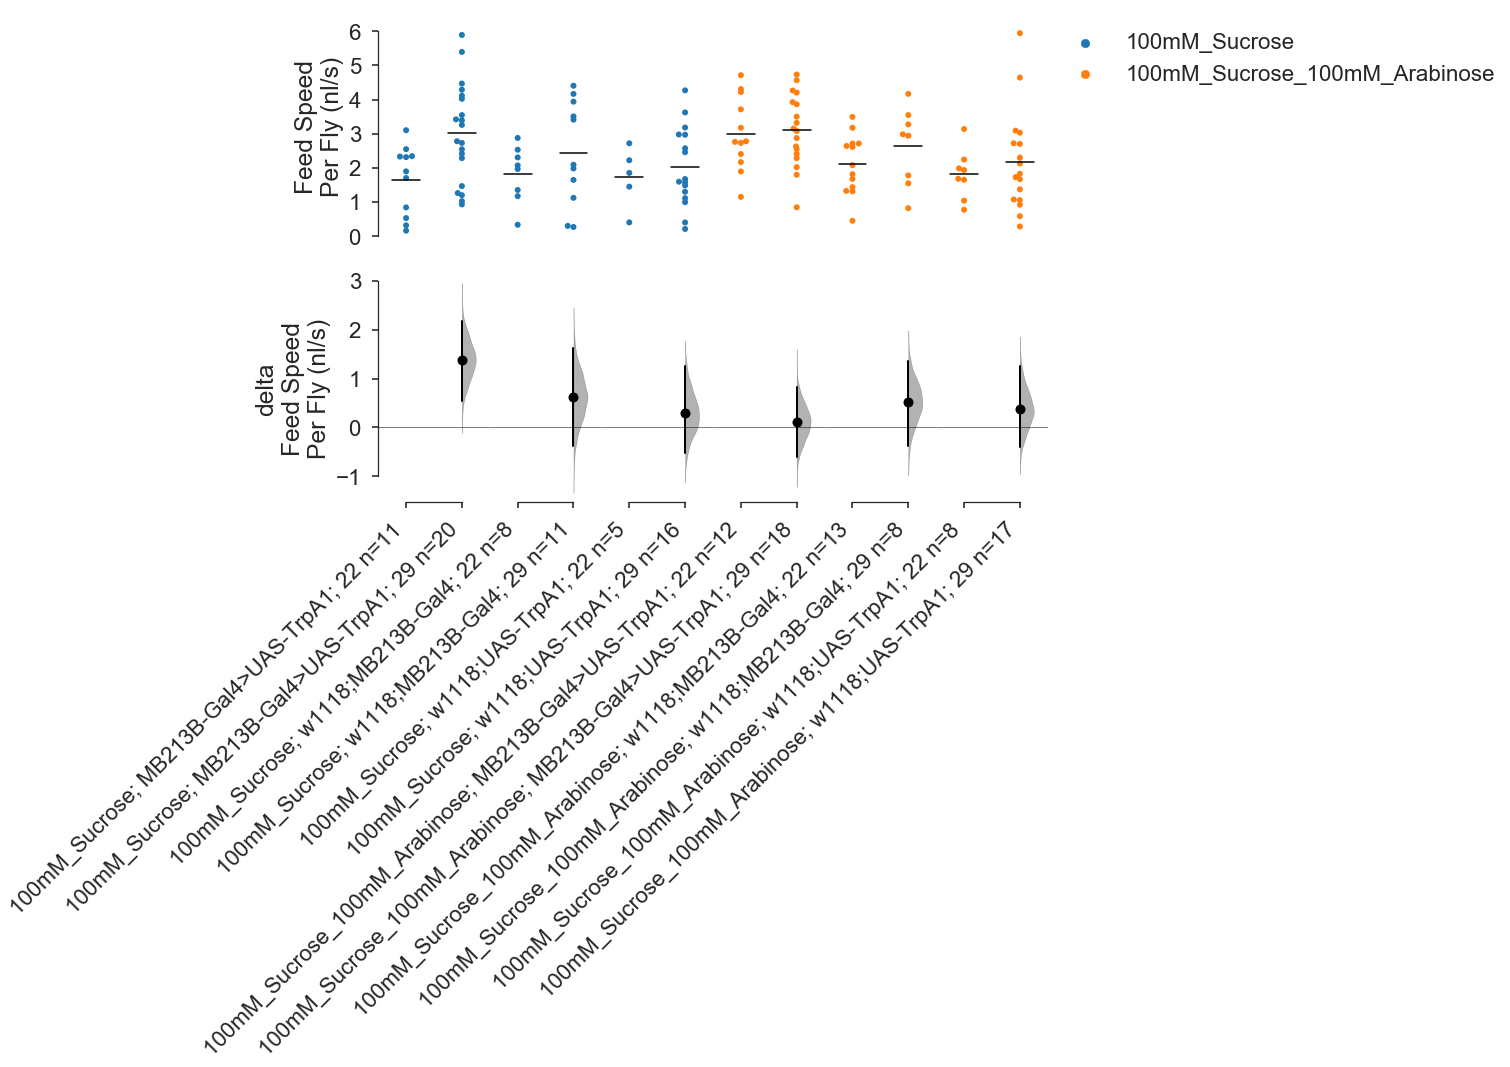

In [17]:
f,b=mb213b.plot.contrast.feed_speed_per_fly(**plot_kwargs)

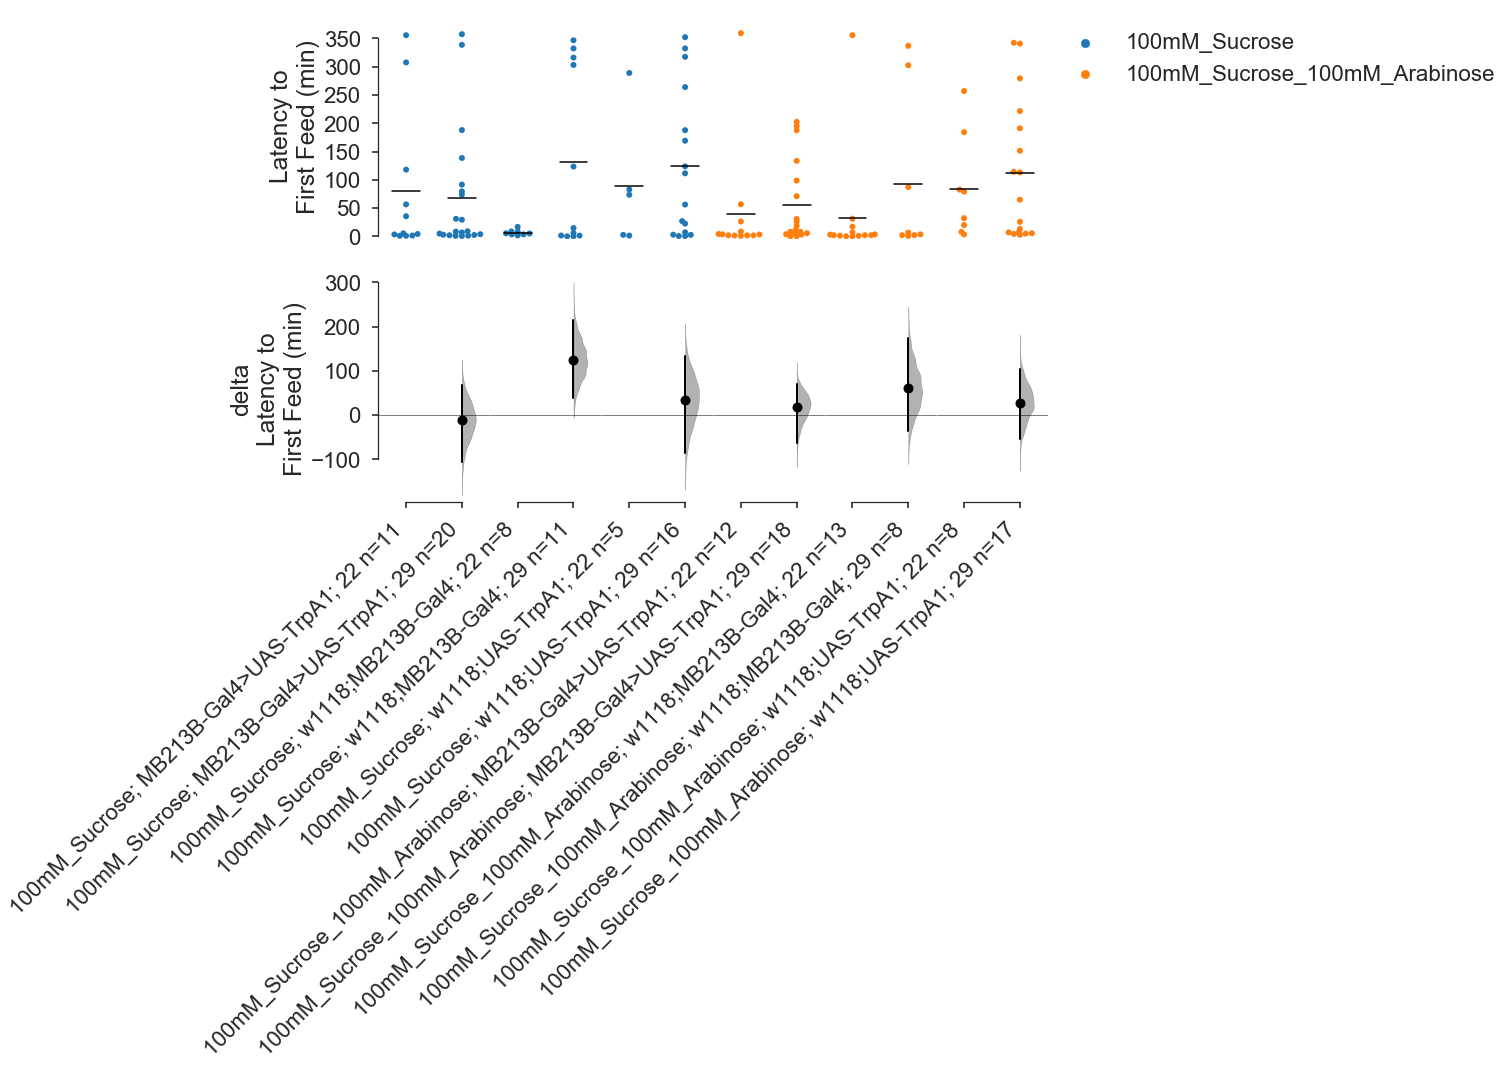

In [18]:
f,b=mb213b.plot.contrast.latency_to_feed_per_fly(**plot_kwargs)

In [7]:
# group_by=['FoodChoice','Genotype']
# compare_by='Temperature'
# color_by='Temperature'

# df=mb213b.feeds.copy()

# for col in ['AverageFeedVolumePerFly_µl','FeedDuration_ms']:
#     df[col].fillna(value=0,inplace=True)

# for c in [compare_by,color_by]:
#     esp._munger.check_column(c,df)
# if len( df[compare_by].unique() )<2:
#     raise ValueError('{} has less than 2 categories and cannot be used for `compare_by`.'.format(compare_by))

# plot_df=pd.DataFrame(df[['FoodChoice', 'Genotype', 'Temperature','FlyID',
#                          'AverageFeedCountPerFly',
#                          'AverageFeedVolumePerFly_µl',
#                          'FeedDuration_ms']]\
#                             .groupby(['Temperature','Genotype','FoodChoice','FlyID'])\
#                             .sum()\
#                             .to_records() )\
#             .dropna() # for some reason, groupby produces NaN rows
# plot_df.reset_index(drop=True, inplace=True)
# plot_df['FeedDuration_min']=plot_df['FeedDuration_ms']/60000
# plot_df.rename(columns={'AverageFeedCountPerFly':'Total Feed Count\nPer Fly',
#                        'AverageFeedVolumePerFly_µl':'Total Feed Volume\nPer Fly (µl)',
#                        'FeedDuration_min':'Total Time\nFeeding Per Fly (min)'},
#                inplace=True)        

# plot_df=esp._munger.cat_categorical_columns(plot_df,group_by,compare_by)

# # Properly arrange idx for grouping.
# idx=[ tuple(i) for i in np.array_split( np.sort(plot_df.plot_groups_with_contrast.unique()), 
#                                         len(plot_df.plot_groups.unique()) ) ]

In [8]:
# # yvar='Total Feed Count\nPer Fly'
# # yvar='Total Feed Volume\nPer Fly'
# yvar='Total Time\nFeeding Per Fly (min)'

# # Make sure the ylims dont stretch below zero but still capture all the datapoints.
# ymax=np.max(plot_df[yvar])*1.1

# f,b=bsc.contrastplot(plot_df,
#                      x='plot_groups_with_contrast',
#                      y=yvar,
#                      idx=idx,
#                      color_col=color_by,
#                      swarm_ylim=(-ymax/80,ymax),
#                      float_contrast=False)

In [9]:
# df[df.FlyID=='2017-02-24_12-05-01_Fly11']

In [10]:
# latency=pd.DataFrame( df.dropna()\
#                         [['FlyID','FoodChoice', 'Genotype', 'Temperature','RelativeTime_s']]\
#                         .groupby(['FoodChoice', 'Genotype', 'Temperature','FlyID'])\
#                         .min()\
#                         .to_records() )\
#         .dropna()
    
# # create new categorical column.
# latency['plot_groups']=esp._munger.join_cols(latency,group_by)
# # add compare_by to the group_by list.
# gby=group_by.copy()
# gby.append(compare_by)
# # Create another categorical column.
# plot_df['plot_groups_with_contrast']=esp._munger.join_cols(plot_df,gby)

# # Properly arrange idx for grouping.
# idx=[ tuple(i) for i in np.array_split( np.sort(plot_df.plot_groups_with_contrast.unique()), 
#                                         len(plot_df.plot_groups.unique()) ) ]

In [11]:
# f,b=bsc.contrastplot(latency,
#                      x='plot_groups_with_contrast',
#                      y=yvar,
#                      idx=idx,
#                      color_col=color_by,
#                      swarm_ylim=(-ymax/80,ymax),
#                      float_contrast=False)